___
# Ciência dos Dados - PROJETO 1

## André Neustein
___

## Classe Social vs Escolaridade em diferentes gerações

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!

Esse trabalho pretende analisar como a classe social influência na escolaridade, e como essa relação muda para diferente gerações e papéis na unidade domiciliar/familia.

___
## Filtros da base de dados

In [69]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [70]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Elcio\Desktop\FACULDADE\3° SEMESTRE\DP CIENCIA DOS DADOS\PROJETO 1


In [71]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados15 = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados11 = pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [72]:
dados15.head(15)

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117
5,5,2015,11,15,4,4,4,1,12,2007,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117
6,6,2015,11,15,4,5,4,6,12,2010,...,6.0,793.0,4.0,1,NaN,NaN,NaN,NaN,793.0,20161117
7,7,2015,11,15,4,6,4,8,9,1997,...,6.0,793.0,4.0,5,1.0,2.0,2.0,1.0,793.0,20161117
8,8,2015,11,15,5,1,2,3,1,1969,...,2.0,2900.0,6.0,2,1.0,2.0,2.0,1.0,2900.0,20161117
9,9,2015,11,15,5,2,4,1,1,1934,...,2.0,2900.0,6.0,2,2.0,NaN,NaN,2.0,2900.0,20161117


In [34]:
#selecionando as colunas
dadosPI = dados15[dados15.UF == 31].loc[:,{"V0401","V0601","V6007","V4750",'V8005','V0102'}]
#filtrando os dados
dadosPI = dadosPI[pd.notnull(dadosPI.V0401)]
dadosPI = dadosPI[pd.notnull(dadosPI.V0601)]
dadosPI = dadosPI[pd.notnull(dadosPI.V6007)]
dadosPI = dadosPI[dadosPI.V4750!=999999999999]
#transformando as respostas numéricas em respostas
dadosPI.V0401=dadosPI.V0401.astype('category')
dadosPI.V0401.cat.categories = (['Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico'])
dadosPI.V6007=dadosPI.V6007.astype('category')
dadosPI.V6007.cat.categories = (['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosPI.V0601=dadosPI.V0601.astype('category')
dadosPI.V0601.cat.categories = (['Sim','Não'])
dadosPI.head(25)

,V8005,V0401,V0601,V4750,V0102,V6007
159852,54,Pessoa de referência,Sim,1900.0,10,Regular do ensino médio ou do 2º grau
159854,40,Pessoa de referência,Sim,450.0,10,Regular do ensino médio ou do 2º grau
159855,34,Cônjuge,Sim,450.0,10,Regular do ensino médio ou do 2º grau
159860,58,Pessoa de referência,Sim,890.0,10,Elementar (primário)
159861,60,Cônjuge,Sim,890.0,10,Regular do ensino médio ou do 2º grau
159862,93,Pessoa de referência,Sim,788.0,10,Elementar (primário)
159863,81,Cônjuge,Sim,788.0,10,Elementar (primário)
159864,36,Pessoa de referência,Sim,897.0,10,Regular do ensino fundamental ou do 1º grau
159866,18,Filho,Sim,897.0,10,Regular do ensino médio ou do 2º grau
159868,79,Outro parente,Sim,897.0,10,Elementar (primário)


In [35]:
#mesmo processo para pnad 2011
#selecionando as colunas
dadosPI11 = dados11[dados11.UF == 31].loc[:,{"V0401","V0601","V6007","V4750"}]
#filtrando os dados
dadosPI11 = dadosPI11[pd.notnull(dadosPI11.V0401)]
dadosPI11 = dadosPI11[pd.notnull(dadosPI11.V0601)]
dadosPI11 = dadosPI11[pd.notnull(dadosPI11.V6007)]
dadosPI11 = dadosPI11[dadosPI11.V4750!=999999999999]
#transformando as respostas numéricas em respostas
dadosPI11.V0401=dadosPI11.V0401.astype('category')
dadosPI11.V0401.cat.categories = (['Pessoa de referência','Cônjuge','Filho','Outro parente','Agregado','Pensionista','Empregado doméstico',''])
dadosPI11.V6007=dadosPI11.V6007.astype('category')
dadosPI11.V6007.cat.categories = (['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosPI11.V0601=dadosPI11.V0601.astype('category')
dadosPI11.V0601.cat.categories = (['Sim','Não'])
dadosPI11.head()

,V6007,V0401,V0601,V4750
163157,Regular do ensino médio ou do 2º grau,Pessoa de referência,Sim,363.0
163158,Regular do ensino médio ou do 2º grau,Cônjuge,Sim,363.0
163163,Elementar (primário),Pessoa de referência,Sim,545.0
163164,Elementar (primário),Pessoa de referência,Sim,545.0
163165,Elementar (primário),Cônjuge,Sim,545.0


In [36]:
dadosPI.V4750.describe()

count    21971.000000
mean      1254.469255
std       1824.954353
min          0.000000
25%        494.000000
50%        788.000000
75%       1301.000000
max      54424.000000
Name: V4750, dtype: float64

In [37]:
dadosPI11.V4750.describe()

count    2.038200e+04
mean     5.082916e+10
std      2.196541e+11
min      0.000000e+00
25%      3.500000e+02
50%      5.960000e+02
75%      1.047000e+03
max      1.000000e+12
Name: V4750, dtype: float64

In [38]:
#transformar renda em faixas (usar salarios minimos)
dadosPI.loc[dadosPI.V4750 <= 81, "classe social"] = "Ext baixa"
dadosPI.loc[(dadosPI.V4750 > 81) & (dadosPI.V4750 <= 291), "classe social"] = "Baixa"
dadosPI.loc[(dadosPI.V4750 > 291) & (dadosPI.V4750 <= 441), "classe social"] = "Med Baixa"
dadosPI.loc[(dadosPI.V4750 > 441) & (dadosPI.V4750 <= 641), "classe social"] = "Média"
dadosPI.loc[(dadosPI.V4750 > 641) & (dadosPI.V4750 <= 1019), "classe social"] = "Med Alta"
dadosPI.loc[dadosPI.V4750 > 1019, "classe social"] = "Alta"
dadosPI.head()

,V8005,V0401,V0601,V4750,V0102,V6007,classe social
159852,54,Pessoa de referência,Sim,1900.0,10,Regular do ensino médio ou do 2º grau,Alta
159854,40,Pessoa de referência,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Média
159855,34,Cônjuge,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Média
159860,58,Pessoa de referência,Sim,890.0,10,Elementar (primário),Med Alta
159861,60,Cônjuge,Sim,890.0,10,Regular do ensino médio ou do 2º grau,Med Alta


In [39]:
dadosPI["classe social"].value_counts()

Alta         7926
Med Alta     5923
Média        3338
Med Baixa    2432
Baixa        1932
Ext baixa     420
Name: classe social, dtype: int64

In [40]:
#fazendo uma tabela com apenas os pais
dados15pai = dadosPI[dadosPI.V0401 == 'Pessoa de referência']
dados15pai.head(15)graf1 = dadosPI["classe social"].value_counts()
graf1.plot (kind='bar', color=('blue'), figsize=(10,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

,V8005,V0401,V0601,V4750,V0102,V6007,classe social
159852,54,Pessoa de referência,Sim,1900.0,10,Regular do ensino médio ou do 2º grau,Alta
159854,40,Pessoa de referência,Sim,450.0,10,Regular do ensino médio ou do 2º grau,Média
159860,58,Pessoa de referência,Sim,890.0,10,Elementar (primário),Med Alta
159862,93,Pessoa de referência,Sim,788.0,10,Elementar (primário),Med Alta
159864,36,Pessoa de referência,Sim,897.0,10,Regular do ensino fundamental ou do 1º grau,Med Alta
159869,44,Pessoa de referência,Sim,119.0,10,Regular do ensino fundamental ou do 1º grau,Baixa
159874,21,Pessoa de referência,Sim,775.0,10,Regular do ensino médio ou do 2º grau,Med Alta
159878,28,Pessoa de referência,Sim,1269.0,10,Regular do ensino fundamental ou do 1º grau,Alta
159880,39,Pessoa de referência,Sim,396.0,10,Regular do ensino fundamental ou do 1º grau,Med Baixa
159886,49,Pessoa de referência,Sim,262.0,10,Regular do ensino médio ou do 2º grau,Baixa


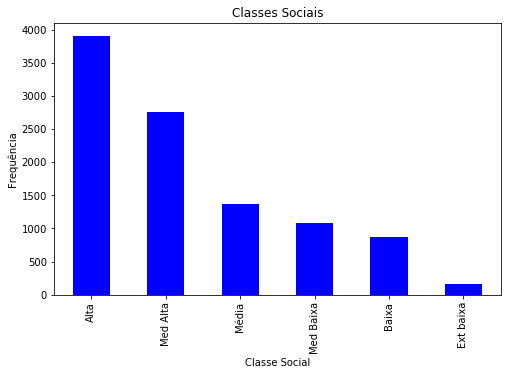

In [63]:
graf1 = dados15pai["classe social"].value_counts()
graf1.plot (kind='bar', color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

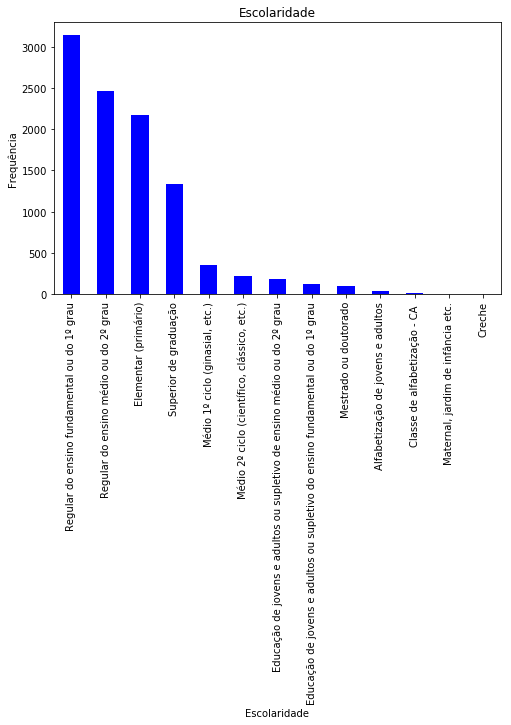

In [64]:
graf2 = dados15pai.V6007.value_counts()
graf2.plot (kind='bar', color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade")

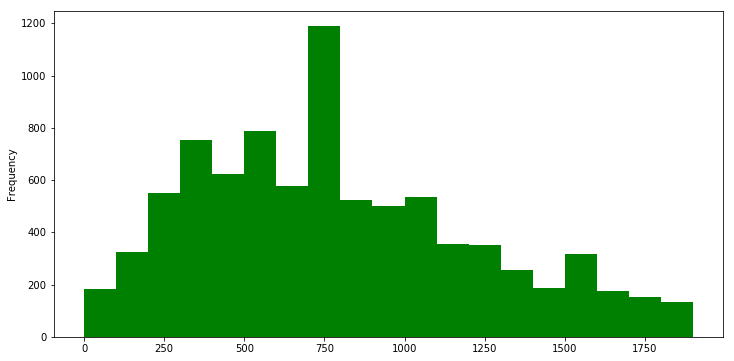

In [73]:
renda = dados15pai.V4750
renda.plot (kind='hist', color=("green"),  bins=range(0,2000,100), figsize=(12,6))

In [65]:
#fazendo uma tabela com os filhos
dados15filho = dadosPI[dadosPI.V0401 == 'Filho']
dados15filho.head(15)

,V8005,V0401,V0601,V4750,V0102,V6007,classe social
159866,18,Filho,Sim,897.0,10,Regular do ensino médio ou do 2º grau,Med Alta
159870,19,Filho,Sim,119.0,10,Superior de graduação,Baixa
159882,17,Filho,Sim,396.0,10,Regular do ensino médio ou do 2º grau,Med Baixa
159887,22,Filho,Sim,262.0,10,Regular do ensino médio ou do 2º grau,Baixa
159888,20,Filho,Sim,262.0,10,Regular do ensino médio ou do 2º grau,Baixa
159908,33,Filho,Sim,525.0,29,Regular do ensino médio ou do 2º grau,Média
159913,20,Filho,Sim,51.0,29,Regular do ensino fundamental ou do 1º grau,Ext baixa
159916,40,Filho,Sim,459.0,29,Regular do ensino fundamental ou do 1º grau,Média
159921,45,Filho,Não,0.0,29,Regular do ensino fundamental ou do 1º grau,Ext baixa
159926,47,Filho,Sim,744.0,29,Regular do ensino médio ou do 2º grau,Med Alta


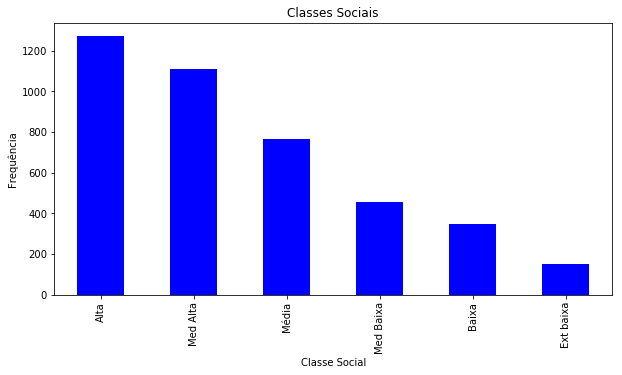

In [66]:
graf3 = dados15filho["classe social"].value_counts()
graf3.plot (kind='bar', color=('blue'), figsize=(10,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

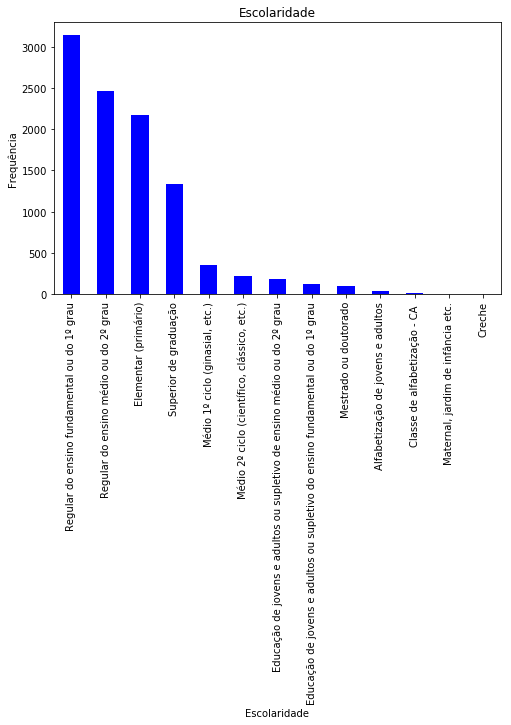

In [67]:
graf4 = dados15pai.V6007.value_counts()
graf4.plot (kind='bar', color=('blue'), figsize=(8,5))
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.title("Escolaridade")

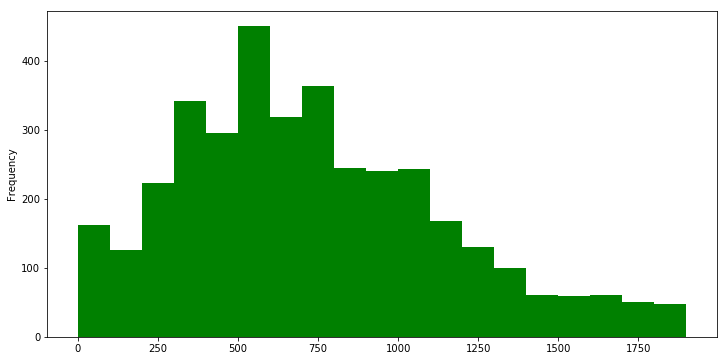

In [74]:
rendafilho = dados15filho.V4750
rendafilho.plot (kind='hist', color=("green"),  bins=range(0,2000,100), figsize=(12,6))

In [32]:
#mudando o nome das colunas
dadosPI = dadosPI.rename (columns = {"V0401":"Papel na familia"})
dadosPI = dadosPI.rename (columns = {"V0601":"Sabe ler e escrever"})
dadosPI = dadosPI.rename (columns = {"V6007":"Curso mais elevado que frequentou"})
dadosPI = dadosPI.rename (columns = {"V4750":"Rendimento familiar per capta"})
dadosPI.head()

,Sabe ler e escrever,Pessoa de referência,Curso mais eelevado que frequentou,Rendimento familiar per capta,V8005,classe social
159852,Sim,Pessoa de referência,Regular do ensino médio ou do 2º grau,1900.0,54,Alta
159854,Sim,Pessoa de referência,Regular do ensino médio ou do 2º grau,450.0,40,Média
159855,Sim,Cônjuge,Regular do ensino médio ou do 2º grau,450.0,34,Média
159860,Sim,Pessoa de referência,Elementar (primário),890.0,58,Med Alta
159861,Sim,Cônjuge,Regular do ensino médio ou do 2º grau,890.0,60,Med Alta


___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!